In [17]:
%load_ext autoreload
%autoreload 2

import os
import warnings

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import io

from src.utils.figure import plot_lines
from src.utils.file import get_data_file_path
from src.utils.file import get_evaluation_file_path
from src.utils.metrics import metrics



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Data Presentation

In [18]:
presentation_row = 150
path = get_data_file_path(event_n=3, formula_n=3, count=2000)
data = pd.read_csv(path)

In [19]:
data.head()

context  \
0  Initially, event3 happened. After event1, even...   
1  Initially, event1 happened. After event3, no o...   
2  Initially, event2 happened. After event2, even...   
3  Initially, event3 happened. After event1, even...   
4  Initially, event2 happened. After event1, even...   

                                               query  \
0  C1: Event1 happens or event2 happens.\nC2: C1 ...   
1  C1: Event2 will happen eventually.\nC2: That e...   
2  C1: Event3 will happen at next time.\nC2: Even...   
3  C1: Event2 happens and event3 happens.\nC2: Ev...   
4  C1: Event3 happens or event3 happens.\nC2: C1 ...   

                                            question  \
0  === Context ===\n\nInitially, event3 happened....   
1  === Context ===\n\nInitially, event1 happened....   
2  === Context ===\n\nInitially, event2 happened....   
3  === Context ===\n\nInitially, event3 happened....   
4  === Context ===\n\nInitially, event2 happened....   

                                                code  \
0  MODULE main\nVAR\n    state : {event1, event2,...   
1  MODULE main\nVAR\n    state : {event1, event2,...   
2  MODULE main\nVAR\n    state : {event1, event2,...   
3  MODULE main\nVAR\n    state : {event1, event2,...   
4  MODULE main\nVAR\n    state : {event1, event2,...   

                            formula  answer  \
0  (X ((event1 | event2) & event1))    True   
1        (G (event2 -> (F event2)))    True   
2        ((X event3) -> (X event3))    True   
3  (! (event1 | (event2 & event3)))    True   
4  (! ((event3 | event3) | event1))    True   

                                               graph  
0  <graphml xmlns="http://graphml.graphdrawing.or...  
1  <graphml xmlns="http://graphml.graphdrawing.or...  
2  <graphml xmlns="http://graphml.graphdrawing.or...  
3  <graphml xmlns="http://graphml.graphdrawing.or...  
4  <graphml xmlns="http://graphml.graphdrawing.or...

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   context   2000 non-null   object
 1   query     2000 non-null   object
 2   question  2000 non-null   object
 3   code      2000 non-null   object
 4   formula   2000 non-null   object
 5   answer    2000 non-null   bool  
 6   graph     2000 non-null   object
dtypes: bool(1), object(6)
memory usage: 95.8+ KB


In [21]:
# Context
print(data.loc[presentation_row, 'context'])

Initially, event3 happened. After event1, event2 can happen. After event1, event3 can happen. After event2, no other events can happen. After event3, event1 can happen. After event3, event2 can happen.


In [22]:
# Query 
print(data.loc[presentation_row, 'query'])

C1: Event2 will happen eventually.
C2: C1 will always be true at any future time.
C3: That event1 happens implies that C2 holds.


In [23]:
# Question
print(data.loc[presentation_row, 'question'])

=== Context ===

Initially, event3 happened. After event1, event2 can happen. After event1, event3 can happen. After event2, no other events can happen. After event3, event1 can happen. After event3, event2 can happen.

=== Hypothesis ===

C1: Event2 will happen eventually.
C2: C1 will always be true at any future time.
C3: That event1 happens implies that C2 holds.

C3 is True or False? Answer with "True" or "False" directly:



In [24]:
# Code
print(data.loc[presentation_row, 'code'])

MODULE main
VAR
    state : {event1, event2, event3};
ASSIGN
    init(state) := event3;
    next(state) := case
        state = event1 : event2;
		state = event1 : event3;
		state = event3 : event1;
		state = event3 : event2;
		state = event2 : event2;
    esac;
LTLSPEC ((state=event1) -> (G (F (state=event2))))



In [25]:
# Formula
print(data.loc[presentation_row, 'formula'])

(event1 -> (G (F event2)))


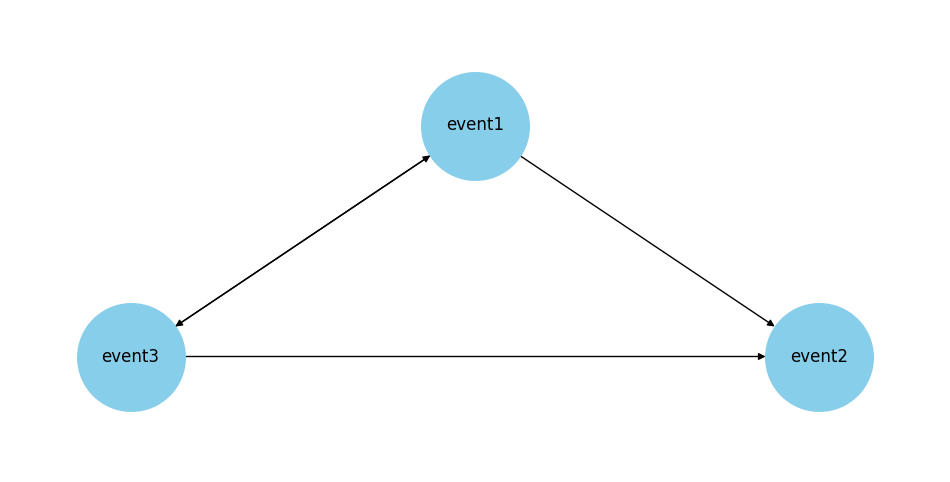

In [26]:
# Plot Graph
graph = nx.read_graphml(io.StringIO(data.loc[presentation_row, 'graph']))
plt.figure(figsize=(12, 6))
plt.xlim(-2.7,2.7)
plt.ylim(-1.0,3.0)
pos = {"event1": (0, 2), "event2": (2, 0), "event3": (-2,0)}
nx.draw(graph, pos, with_labels=True, node_size=6000, node_color='skyblue')
plt.show()

In [27]:
# Answer
print(data.loc[presentation_row, 'answer'])

True


# Prediction Presentation


In [28]:
path = get_evaluation_file_path(event_n=3, formula_n=3, count=2000, model="gpt-3.5-turbo")
data = pd.read_csv(path)

In [29]:
data.head()

context  \
0  Initially, event3 happened. After event1, even...   
1  Initially, event1 happened. After event3, no o...   
2  Initially, event2 happened. After event2, even...   
3  Initially, event3 happened. After event1, even...   
4  Initially, event2 happened. After event1, even...   

                                               query  \
0  C1: Event1 happens or event2 happens.\nC2: C1 ...   
1  C1: Event2 will happen eventually.\nC2: That e...   
2  C1: Event3 will happen at next time.\nC2: Even...   
3  C1: Event2 happens and event3 happens.\nC2: Ev...   
4  C1: Event3 happens or event3 happens.\nC2: C1 ...   

                                            question  \
0  === Context ===\n\nInitially, event3 happened....   
1  === Context ===\n\nInitially, event1 happened....   
2  === Context ===\n\nInitially, event2 happened....   
3  === Context ===\n\nInitially, event3 happened....   
4  === Context ===\n\nInitially, event2 happened....   

                                                code  \
0  MODULE main\nVAR\n    state : {event1, event2,...   
1  MODULE main\nVAR\n    state : {event1, event2,...   
2  MODULE main\nVAR\n    state : {event1, event2,...   
3  MODULE main\nVAR\n    state : {event1, event2,...   
4  MODULE main\nVAR\n    state : {event1, event2,...   

                            formula  answer  \
0  (X ((event1 | event2) & event1))    True   
1        (G (event2 -> (F event2)))    True   
2        ((X event3) -> (X event3))    True   
3  (! (event1 | (event2 & event3)))    True   
4  (! ((event3 | event3) | event1))    True   

                                               graph  prediction  \
0  <graphml xmlns="http://graphml.graphdrawing.or...         1.0   
1  <graphml xmlns="http://graphml.graphdrawing.or...         1.0   
2  <graphml xmlns="http://graphml.graphdrawing.or...         1.0   
3  <graphml xmlns="http://graphml.graphdrawing.or...         0.0   
4  <graphml xmlns="http://graphml.graphdrawing.or...         0.0   

   prediction_raw  
0            True  
1            True  
2            True  
3           False  
4           False

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   context         2000 non-null   object 
 1   query           2000 non-null   object 
 2   question        2000 non-null   object 
 3   code            2000 non-null   object 
 4   formula         2000 non-null   object 
 5   answer          2000 non-null   bool   
 6   graph           2000 non-null   object 
 7   prediction      2000 non-null   float64
 8   prediction_raw  2000 non-null   bool   
dtypes: bool(2), float64(1), object(6)
memory usage: 113.4+ KB


In [31]:
data['answer'] = data['answer'].apply(lambda x: 1 if x else 0)
data['prediction'] = data['prediction'].astype(int)

In [32]:
# Accuracy
print(f'{len(data[data["answer"] == data["prediction"]]) * 100 / len(data)}%')

56.0%


In [33]:
# Prediction Distribution
data['prediction'].value_counts()

prediction
1    1322
0     678
Name: count, dtype: int64

In [34]:
# Precision, Recall, F1
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(data['answer'], data['prediction'], average='macro')
recall = recall_score(data['answer'], data['prediction'], average='macro')
f1 = f1_score(data['answer'], data['prediction'], average='macro')

print("Precision:", precision)
print("Recall:", recall)
print("F1:", f1)

Precision: 0.5669406771718903
Recall: 0.56
F1: 0.548291257690598


# LLMs Evaluation


In [35]:
models = ["gpt-3.5-turbo", "llama3:70b-instruct", "qwen:72b-chat", "gemma:7b-instruct", "qwen:7b-chat",
          "mistral:7b-instruct"]

## 1. LTLBench: Event 3, Operator 3, Count 2000

In [36]:
models_metrics = {}
for model in models:
    path = get_evaluation_file_path(event_n=3, formula_n=3, count=2000, model=model)
    if not os.path.exists(path):
        warnings.warn(f"Evaluation file of model {model} does not exist.", UserWarning)
        continue
    data = pd.read_csv(path)
    data['answer'] = data['answer'].apply(lambda x: 1 if x else 0)
    data['prediction'] = data['prediction'].astype(int)
    models_metrics[model] = metrics(data)['raw']

df = pd.DataFrame(models_metrics)
df.transpose()

accuracy  precision  recall        f1     auc
gpt-3.5-turbo          0.5600   0.566941  0.5600  0.548291  0.5600
llama3:70b-instruct    0.5915   0.593250  0.5915  0.589574  0.5915
qwen:72b-chat          0.5960   0.600518  0.5960  0.591409  0.5960
gemma:7b-instruct      0.5470   0.554178  0.5470  0.531481  0.5470
qwen:7b-chat           0.5435   0.543504  0.5435  0.543491  0.5435
mistral:7b-instruct    0.5390   0.562848  0.5390  0.490684  0.5390

In [37]:
# large models mean
df.transpose().loc[['gpt-3.5-turbo', 'llama3:70b-instruct', 'qwen:72b-chat']].mean()

accuracy     0.582500
precision    0.586903
recall       0.582500
f1           0.576425
auc          0.582500
dtype: float64

In [38]:
# small models mean
df.transpose().loc[['gemma:7b-instruct', 'qwen:7b-chat', 'mistral:7b-instruct']].mean()

accuracy     0.543167
precision    0.553510
recall       0.543167
f1           0.521885
auc          0.543167
dtype: float64

## 2. Event 2, Operator 1-9, Count 300

In [39]:
event_n = 2
count = 300
formulas = [1, 2, 3, 4, 5, 7, 9]

models_data_df = pd.DataFrame()
for model in models:
    data = {}
    for formula_n in formulas:
        path = get_evaluation_file_path(event_n=event_n, formula_n=formula_n, count=count, model=model)
        if not os.path.exists(path):
            warnings.warn(f"Evaluation file of model {model} does not exist.", UserWarning)
            continue
        df = pd.read_csv(path)
        df['answer'] = df['answer'].apply(lambda x: 1 if x else 0)
        df['prediction'] = df['prediction'].astype(int)
        data[formula_n] = metrics(df)['raw']
    df = pd.DataFrame(data).transpose().reset_index().rename(columns={'index': 'number_of_operators'})
    df['model'] = model
    models_data_df = pd.concat([models_data_df, df], ignore_index=True)

models_data_df

number_of_operators  accuracy  precision    recall        f1       auc  \
0                     1  0.710000   0.714198  0.710000  0.708572  0.710000   
1                     2  0.603333   0.615677  0.603333  0.592461  0.603333   
2                     3  0.600000   0.620605  0.600000  0.582153  0.600000   
3                     4  0.596667   0.612981  0.596667  0.581561  0.596667   
4                     5  0.603333   0.616840  0.603333  0.591529  0.603333   
5                     7  0.576667   0.587603  0.576667  0.563028  0.576667   
6                     9  0.596667   0.608214  0.596667  0.585612  0.596667   
7                     1  0.646667   0.661892  0.646667  0.638159  0.646667   
8                     2  0.603333   0.606286  0.603333  0.600559  0.603333   
9                     3  0.630000   0.631692  0.630000  0.628808  0.630000   
10                    4  0.606667   0.606743  0.606667  0.606597  0.606667   
11                    5  0.590000   0.591468  0.590000  0.588349  0.590000   
12                    7  0.570000   0.570530  0.570000  0.569191  0.570000   
13                    9  0.596667   0.598994  0.596667  0.594282  0.596667   
14                    1  0.696667   0.699874  0.696667  0.695445  0.696667   
15                    2  0.593333   0.612564  0.593333  0.575189  0.593333   
16                    3  0.606667   0.615741  0.606667  0.598803  0.606667   
17                    4  0.556667   0.567038  0.556667  0.538830  0.556667   
18                    5  0.590000   0.601764  0.590000  0.577798  0.590000   
19                    7  0.603333   0.635403  0.603333  0.578368  0.603333   
20                    9  0.540000   0.547032  0.540000  0.522139  0.540000   
21                    1  0.600000   0.600018  0.600000  0.599982  0.600000   
22                    2  0.526667   0.528495  0.526667  0.518948  0.526667   
23                    3  0.556667   0.557096  0.556667  0.555833  0.556667   
24                    4  0.580000   0.580515  0.580000  0.579327  0.580000   
25                    5  0.590000   0.590487  0.590000  0.589448  0.590000   
26                    7  0.586667   0.621118  0.586667  0.555024  0.586667   
27                    9  0.556667   0.575556  0.556667  0.527111  0.556667   
28                    1  0.633333   0.637463  0.633333  0.630558  0.633333   
29                    2  0.536667   0.543932  0.536667  0.516684  0.536667   
30                    3  0.553333   0.553677  0.553333  0.552618  0.553333   
31                    4  0.560000   0.561859  0.560000  0.556670  0.560000   
32                    5  0.600000   0.605416  0.600000  0.594795  0.600000   
33                    7  0.590000   0.595182  0.590000  0.584342  0.590000   
34                    9  0.563333   0.566555  0.563333  0.557985  0.563333   
35                    1  0.610000   0.662029  0.610000  0.575959  0.610000   
36                    2  0.580000   0.588305  0.580000  0.569888  0.580000   
37                    3  0.610000   0.628565  0.610000  0.595394  0.610000   
38                    4  0.573333   0.646484  0.573333  0.512468  0.573333   
39                    5  0.570000   0.642521  0.570000  0.507326  0.570000   
40                    7  0.550000   0.601801  0.550000  0.484411  0.550000   
41                    9  0.576667   0.669467  0.576667  0.509520  0.576667   

                  model  
0         gpt-3.5-turbo  
1         gpt-3.5-turbo  
2         gpt-3.5-turbo  
3         gpt-3.5-turbo  
4         gpt-3.5-turbo  
5         gpt-3.5-turbo  
6         gpt-3.5-turbo  
7   llama3:70b-instruct  
8   llama3:70b-instruct  
9   llama3:70b-instruct  
10  llama3:70b-instruct  
11  llama3:70b-instruct  
12  llama3:70b-instruct  
13  llama3:70b-instruct  
14        qwen:72b-chat  
15        qwen:72b-chat  
16        qwen:72b-chat  
17        qwen:72b-chat  
18        qwen:72b-chat  
19        qwen:72b-chat  
20        qwen:72b-chat  
21    gemma:7b-instruct  
22    gemma:7b-instruct  
23    gemma:7b-instruct  

### 2.1. Accuracy

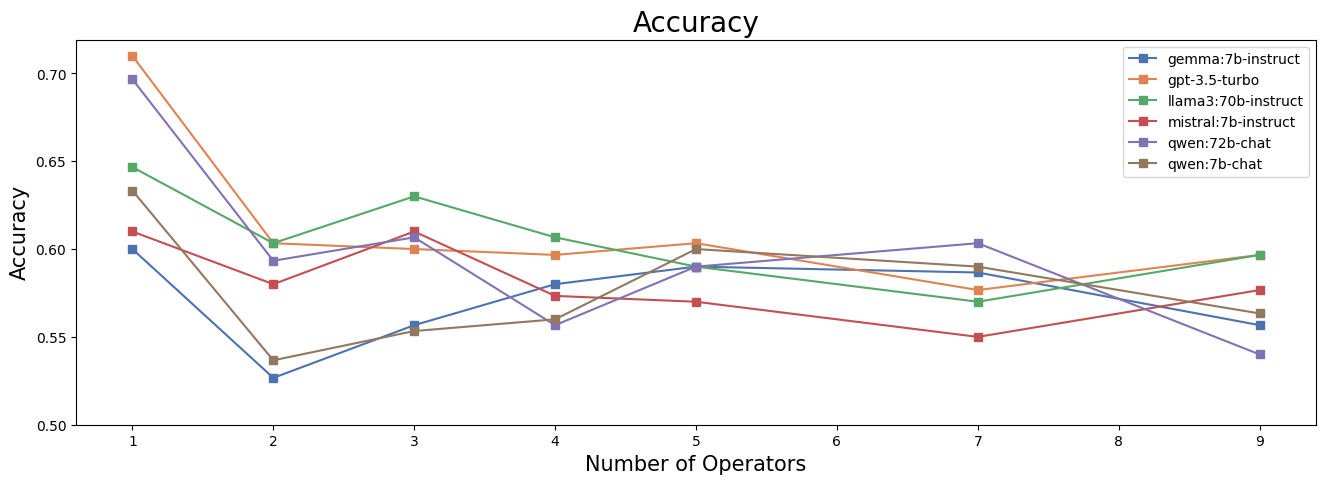

In [40]:
x_ticks = list(np.arange(1, 10))
y_ticks = list(np.arange(0.5, 0.75, 0.05))
plot_lines(models_data_df, x='number_of_operators', y='accuracy', z='model', title='Accuracy', x_label='Number of Operators',
           y_label='Accuracy', x_ticks=x_ticks, y_ticks=y_ticks)

### 2.2. Precision

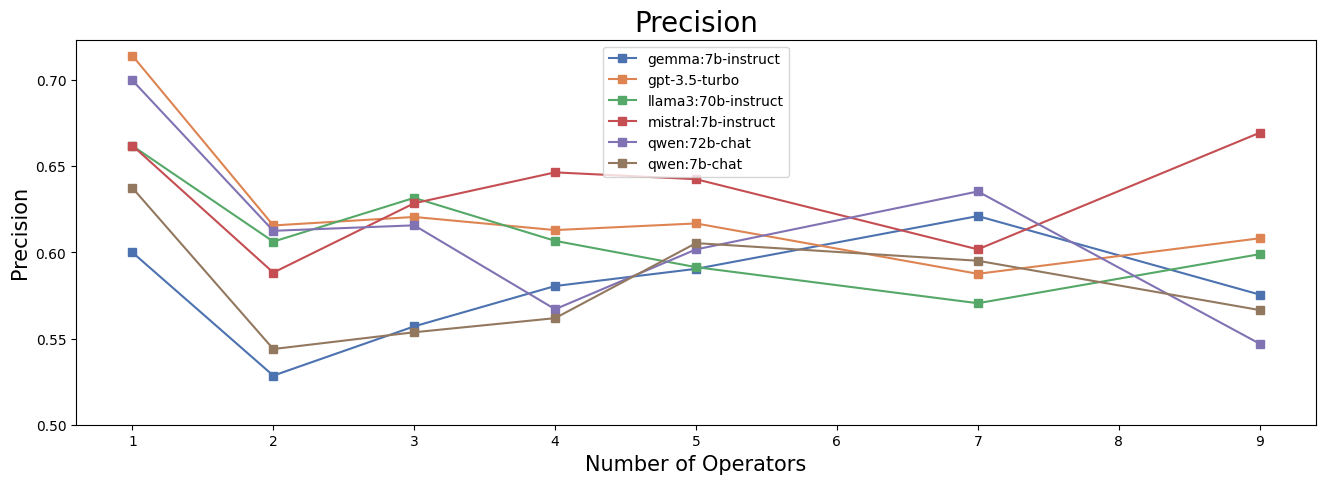

In [41]:
x_ticks = list(np.arange(1, 10))
y_ticks = list(np.arange(0.5, 0.75, 0.05))
plot_lines(models_data_df, x='number_of_operators', y='precision', z='model', title='Precision', x_label='Number of Operators',
           y_label='Precision', x_ticks=x_ticks, y_ticks=y_ticks)

### 2.3. Recall

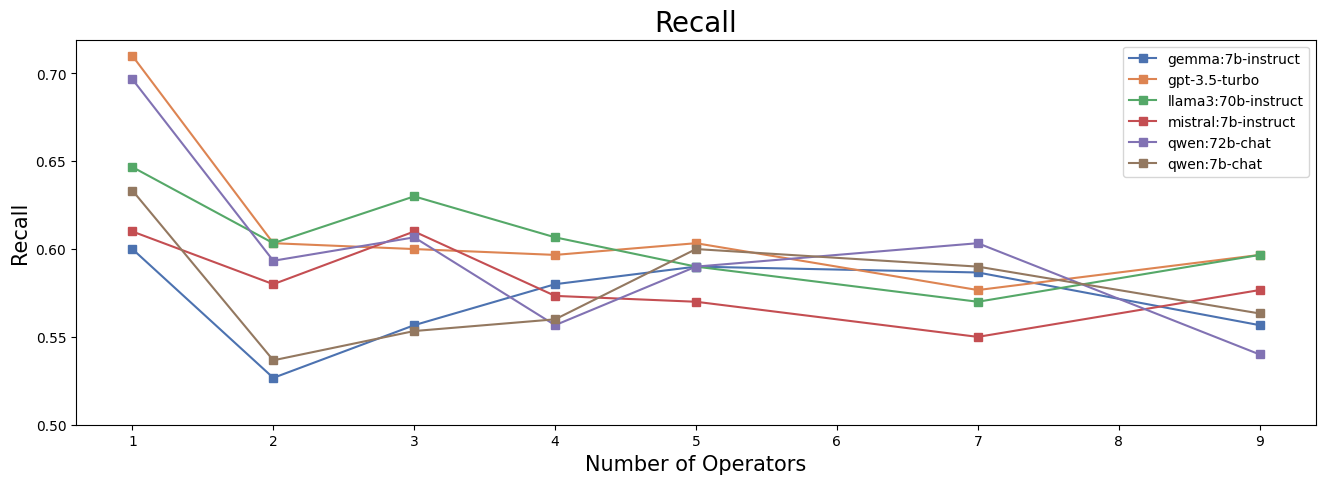

In [42]:
x_ticks = list(np.arange(1, 10))
y_ticks = list(np.arange(0.5, 0.75, 0.05))
plot_lines(models_data_df, x='number_of_operators', y='recall', z='model', title='Recall', x_label='Number of Operators',
           y_label='Recall', x_ticks=x_ticks, y_ticks=y_ticks)

### 2.4. F1

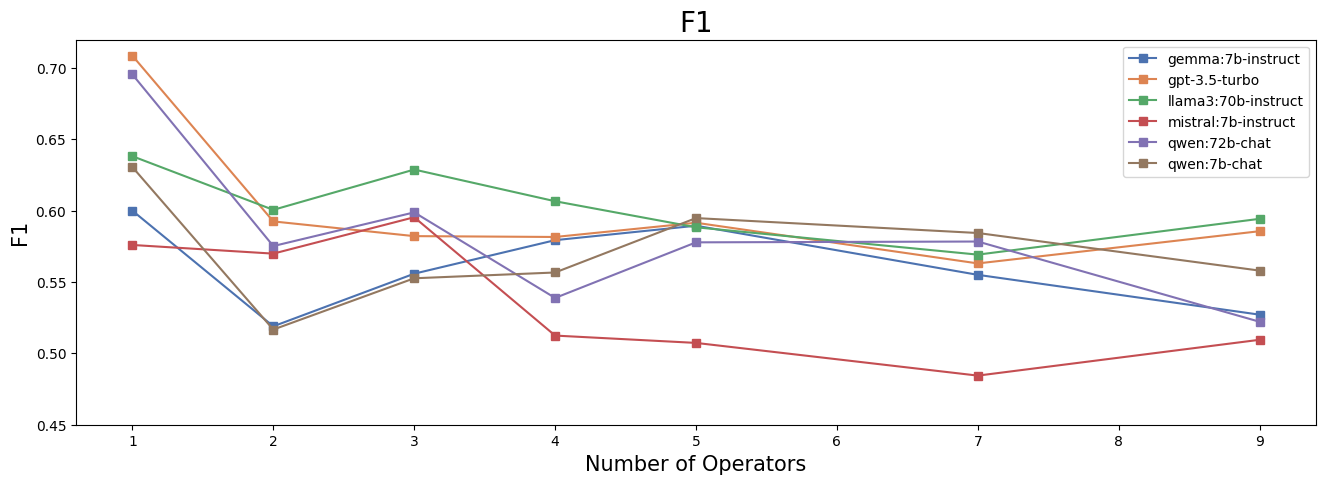

In [43]:
x_ticks = list(np.arange(1, 10))
y_ticks = list(np.arange(0.45, 0.75, 0.05))
plot_lines(models_data_df, x='number_of_operators', y='f1', z='model', title='F1', x_label='Number of Operators', y_label='F1',
           x_ticks=x_ticks, y_ticks=y_ticks)

### 2.5. AUC

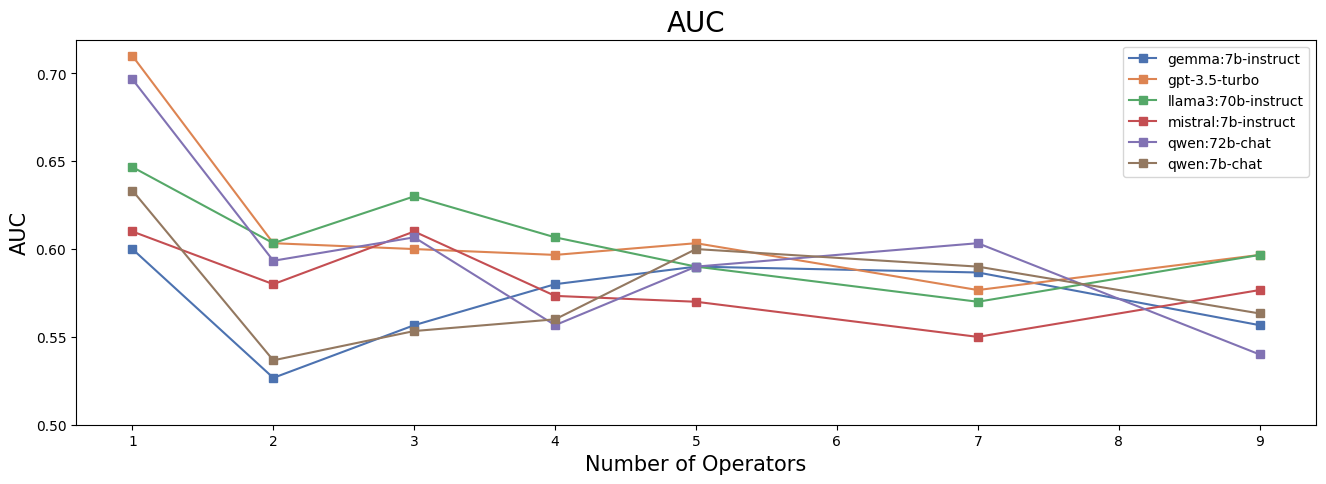

In [44]:
x_ticks = list(np.arange(1, 10))
y_ticks = list(np.arange(0.5, 0.75, 0.05))
plot_lines(models_data_df, x='number_of_operators', y='auc', z='model', title='AUC', x_label='Number of Operators', y_label='AUC',
           x_ticks=x_ticks, y_ticks=y_ticks)

## 3. Operator 2, Event 2-9, Count 300

In [45]:
count = 300
formulas = 2
events_n = [2, 3, 4, 5, 7, 9]

models_data_df = pd.DataFrame()
for model in models:
    data = {}
    for e_n in events_n:
        path = get_evaluation_file_path(event_n=e_n, formula_n=formulas, count=count, model=model)
        if not os.path.exists(path):
            warnings.warn(f"Evaluation file of model {model} does not exist.", UserWarning)
            continue
        df = pd.read_csv(path)
        df['answer'] = df['answer'].apply(lambda x: 1 if x else 0)
        df['prediction'] = df['prediction'].astype(int)
        data[e_n] = metrics(df)['raw']
    df = pd.DataFrame(data).transpose().reset_index().rename(columns={'index': 'number_of_events'})
    df['model'] = model
    models_data_df = pd.concat([models_data_df, df], ignore_index=True)

models_data_df

number_of_events  accuracy  precision    recall        f1       auc  \
0                  2  0.603333   0.615677  0.603333  0.592461  0.603333   
1                  3  0.516667   0.518159  0.516667  0.506529  0.516667   
2                  4  0.593333   0.595385  0.593333  0.591135  0.593333   
3                  5  0.550000   0.550815  0.550000  0.548188  0.550000   
4                  7  0.530000   0.530600  0.530000  0.527686  0.530000   
5                  9  0.536667   0.536944  0.536667  0.535795  0.536667   
6                  2  0.603333   0.606286  0.603333  0.600559  0.603333   
7                  3  0.583333   0.584418  0.583333  0.581991  0.583333   
8                  4  0.613333   0.615385  0.613333  0.611607  0.613333   
9                  5  0.570000   0.570707  0.570000  0.568922  0.570000   
10                 7  0.520000   0.350192  0.346667  0.348396  0.521444   
11                 9  0.503333   0.336763  0.335556  0.335818  0.501756   
12                 2  0.593333   0.612564  0.593333  0.575189  0.593333   
13                 3  0.536667   0.546508  0.536667  0.510787  0.536667   
14                 4  0.586667   0.595663  0.586667  0.576715  0.586667   
15                 5  0.546667   0.370351  0.364444  0.354114  0.550889   
16                 7  0.560000   0.390786  0.373333  0.354408  0.562911   
17                 9  0.563333   0.589403  0.563333  0.528997  0.563333   
18                 2  0.526667   0.528495  0.526667  0.518948  0.526667   
19                 3  0.556667   0.567895  0.556667  0.537547  0.556667   
20                 4  0.600000   0.632166  0.600000  0.574085  0.600000   
21                 5  0.566667   0.597125  0.566667  0.529803  0.566667   
22                 7  0.566667   0.628381  0.566667  0.507476  0.566667   
23                 9  0.563333   0.602881  0.563333  0.516908  0.563333   
24                 2  0.536667   0.543932  0.536667  0.516684  0.536667   
25                 3  0.560000   0.565649  0.560000  0.550327  0.560000   
26                 4  0.530000   0.531339  0.530000  0.524927  0.530000   
27                 5  0.530000   0.530227  0.530000  0.529116  0.530000   
28                 7  0.493333   0.491960  0.493333  0.470728  0.493333   
29                 9  0.466667   0.366071  0.466667  0.343365  0.466667   
30                 2  0.580000   0.588305  0.580000  0.569888  0.580000   
31                 3  0.570000   0.593333  0.570000  0.541333  0.570000   
32                 4  0.520000   0.527412  0.520000  0.485199  0.520000   
33                 5  0.510000   0.512887  0.510000  0.480926  0.510000   
34                 7  0.516667   0.350798  0.344444  0.315397  0.513978   
35                 9  0.470000   0.304014  0.313333  0.276649  0.473511   

                  model  
0         gpt-3.5-turbo  
1         gpt-3.5-turbo  
2         gpt-3.5-turbo  
3         gpt-3.5-turbo  
4         gpt-3.5-turbo  
5         gpt-3.5-turbo  
6   llama3:70b-instruct  
7   llama3:70b-instruct  
8   llama3:70b-instruct  
9   llama3:70b-instruct  
10  llama3:70b-instruct  
11  llama3:70b-instruct  
12        qwen:72b-chat  
13        qwen:72b-chat  
14        qwen:72b-chat  
15        qwen:72b-chat  
16        qwen:72b-chat  
17        qwen:72b-chat  
18    gemma:7b-instruct  
19    gemma:7b-instruct  
20    gemma:7b-instruct  
21    gemma:7b-instruct  
22    gemma:7b-instruct  
23    gemma:7b-instruct  
24         qwen:7b-chat  
25         qwen:7b-chat  
26         qwen:7b-chat  
27         qwen:7b-chat  
28         qwen:7b-chat  
29         qwen:7b-chat  
30  mistral:7b-instruct  
31  mistral:7b-instruct  
32  mistral:7b-instruct  
33  mistral:7b-instruct  
34  mistral:7b-instruct  
35  mistral:7b-instruct

### 3.1. Accuracy

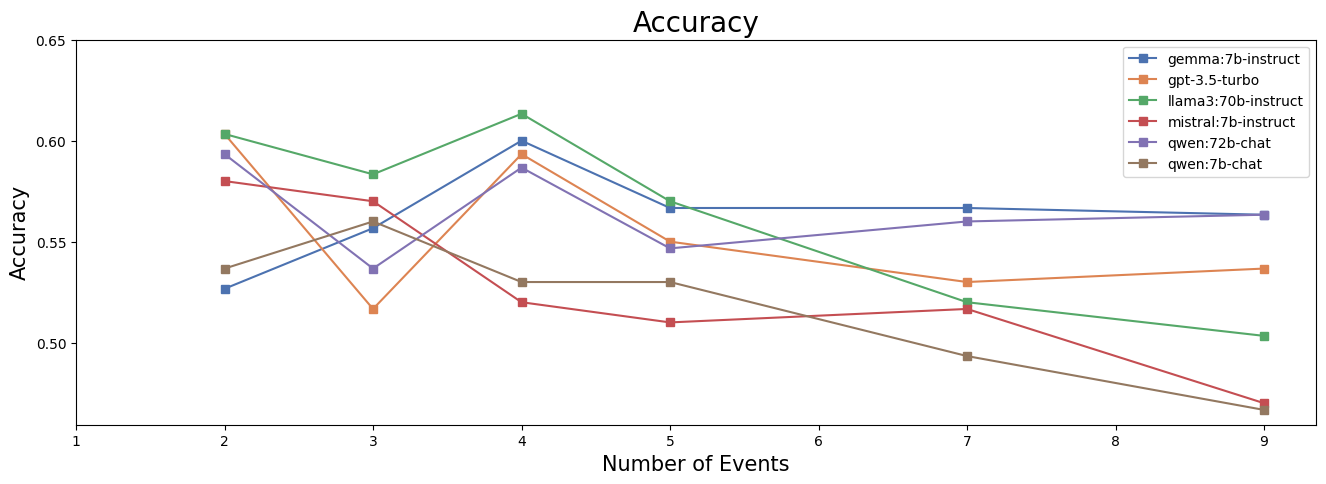

In [46]:
x_ticks = list(np.arange(1, 10))
y_ticks = list(np.arange(0.5, 0.65, 0.05))
plot_lines(models_data_df, x='number_of_events', y='accuracy', z='model', title='Accuracy', x_label='Number of Events',
           y_label='Accuracy', x_ticks=x_ticks, y_ticks=y_ticks)

### 3.2. Precision

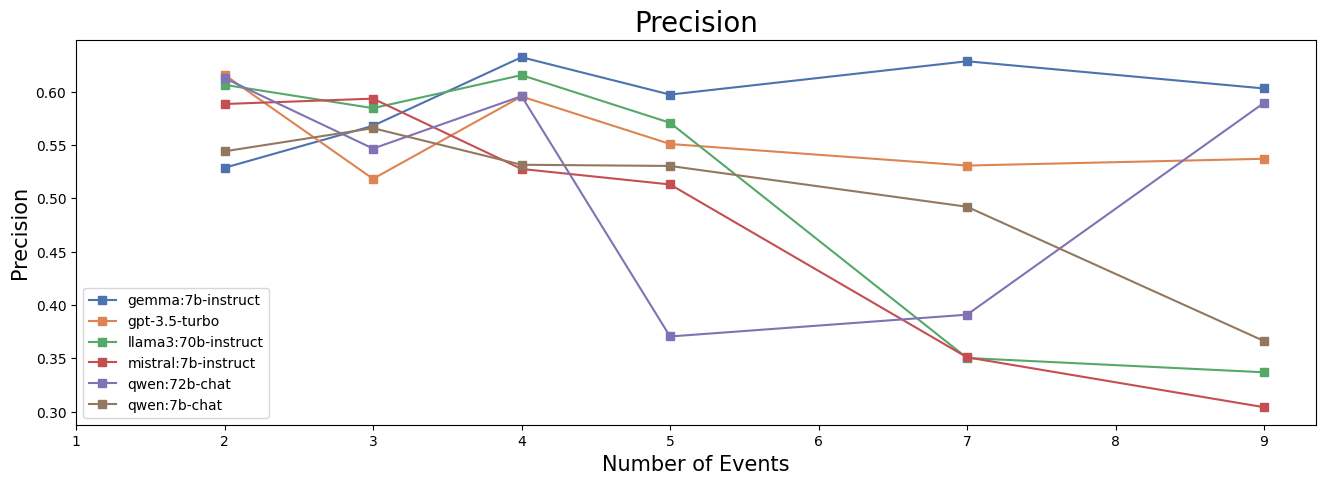

In [47]:
x_ticks = list(np.arange(1, 10))
y_ticks = list(np.arange(0.3, 0.65, 0.05))
plot_lines(models_data_df, x='number_of_events', y='precision', z='model', title='Precision', x_label='Number of Events',
           y_label='Precision', x_ticks=x_ticks, y_ticks=y_ticks)

### 3.3. Recall

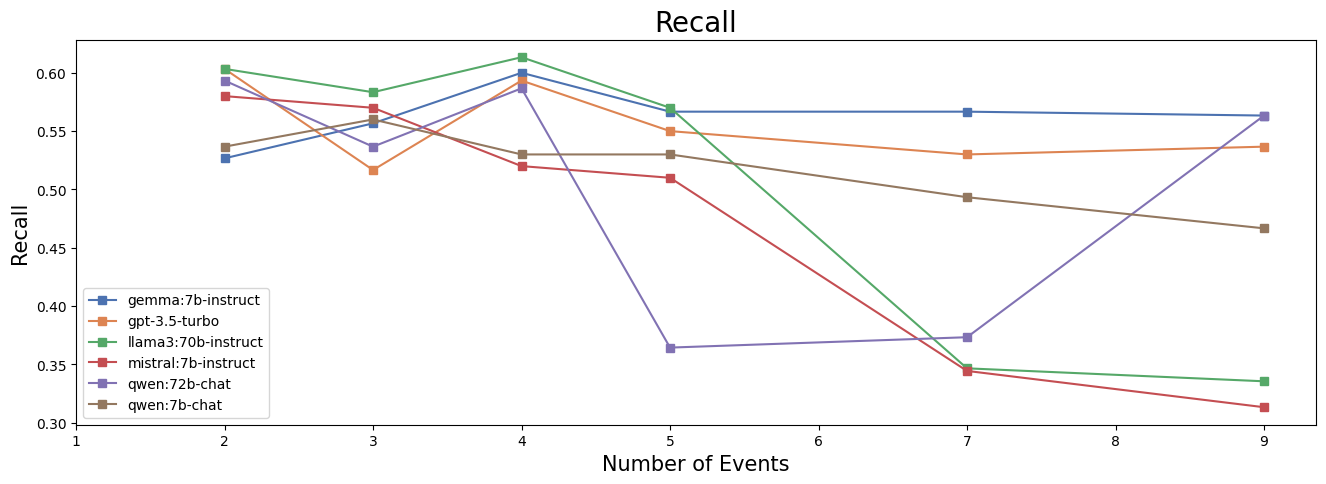

In [48]:
x_ticks = list(np.arange(1, 10))
y_ticks = list(np.arange(0.3, 0.65, 0.05))
plot_lines(models_data_df, x='number_of_events', y='recall', z='model', title='Recall', x_label='Number of Events',
           y_label='Recall', x_ticks=x_ticks, y_ticks=y_ticks)

### 3.4. F1

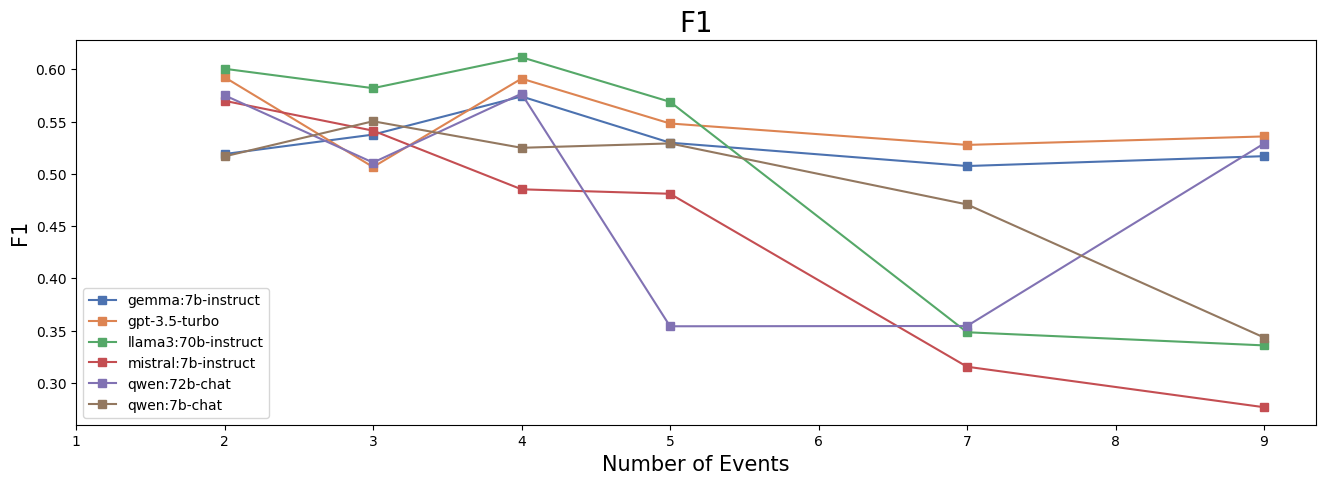

In [49]:
x_ticks = list(np.arange(1, 10))
y_ticks = list(np.arange(0.3, 0.65, 0.05))
plot_lines(models_data_df, x='number_of_events', y='f1', z='model', title='F1', x_label='Number of Events', y_label='F1',
           x_ticks=x_ticks, y_ticks=y_ticks)

### 3.5. AUC

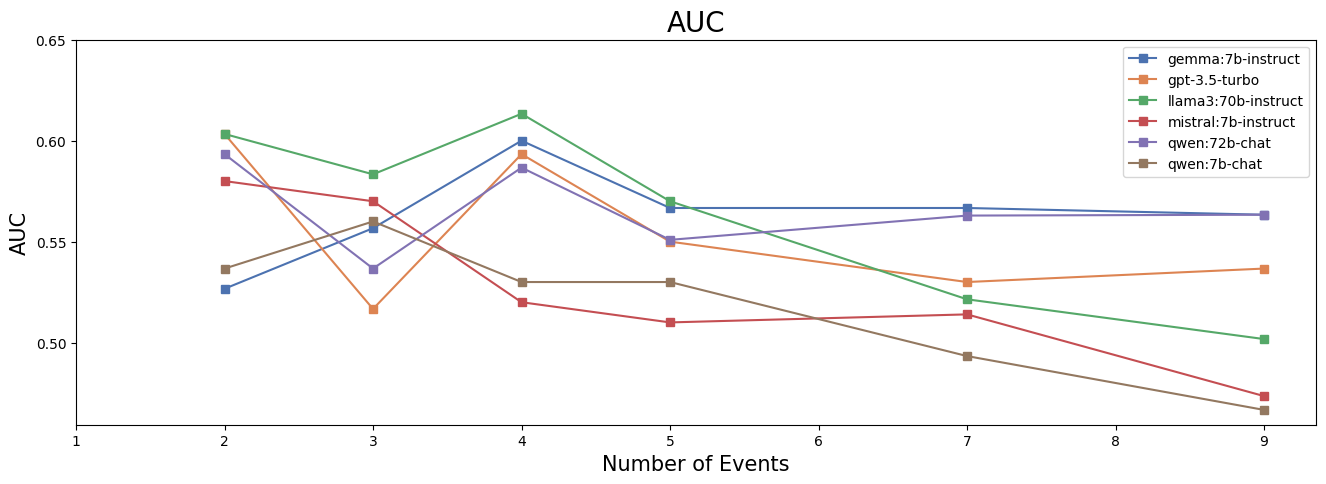

In [50]:
x_ticks = list(np.arange(1, 10))
y_ticks = list(np.arange(0.5, 0.65, 0.05))
plot_lines(models_data_df, x='number_of_events', y='auc', z='model', title='AUC', x_label='Number of Events', y_label='AUC',
           x_ticks=x_ticks, y_ticks=y_ticks)